# Figure 11.3 - TXx scaling

Author: Mathias Hauser

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import conf
from utils import computation, plot, scaling_plot, save_figuredata
import data_tables

mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["font.sans-serif"] = "Arial"

In [2]:
FIGURE_FOLDER = "Figure_11.3_TXx_scaling"

plot.create_figure_folders(FIGURE_FOLDER, conf.cmip6)

## Load data

### global mean tas

In [3]:
c6_tas = conf.cmip6.load_post_all_concat(
    varn="tas",
    postprocess="global_mean"
)

 -- {'varn': 'tas', 'postprocess': 'global_mean', 'table': 'Amon', 'model': 'IITM-ESM', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2098)


In [4]:
c6_txx_reg_no_anom = conf.cmip6.load_post_all_concat(
    varn="tasmax",
    postprocess="txx_reg_ave_ar6",
    anomaly="no_anom"
)

-- no data found for: {'exp': 'historical', 'varn': 'tasmax', 'postprocess': 'txx_reg_ave_ar6', 'table': 'day', 'model': 'EC-Earth3', 'ens': 'r4i1p1f1', 'grid': 'gr', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tasmax', 'postprocess': 'txx_reg_ave_ar6', 'table': 'day', 'model': 'IITM-ESM', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tasmax', 'postprocess': 'txx_reg_ave_ar6', 'table': 'day', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p5f2', 'grid': 'gn', 'ensnumber': 0}
 -- {'varn': 'tasmax', 'postprocess': 'txx_reg_ave_ar6', 'table': 'day', 'model': 'BCC-ESM1', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2055)
 -- {'varn': 'tasmax', 'postprocess': 'txx_reg_ave_ar6', 'table': 'day', 'model': 'MPI-ESM-1-2-HAM', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2055)


In [5]:
c6_txx_reg = computation.process_datalist(
    computation.calc_anomaly, c6_txx_reg_no_anom, start=1850, end=1900, how="absolute"
)

### Compute at warming levels

In [6]:
warming_levels = np.arange(0.1, 5.1, 0.1)

c6_at_warming_txx_ = computation.at_warming_levels_list(
    c6_tas, c6_txx_reg, warming_levels=warming_levels
)

concat and ensure correct alignment

In [7]:
c6_at_warming_txx = scaling_plot.concat_for_scaling(c6_at_warming_txx_, warming_levels)

## Plot region groups

In [8]:
colors = sns.color_palette("Paired", 12)

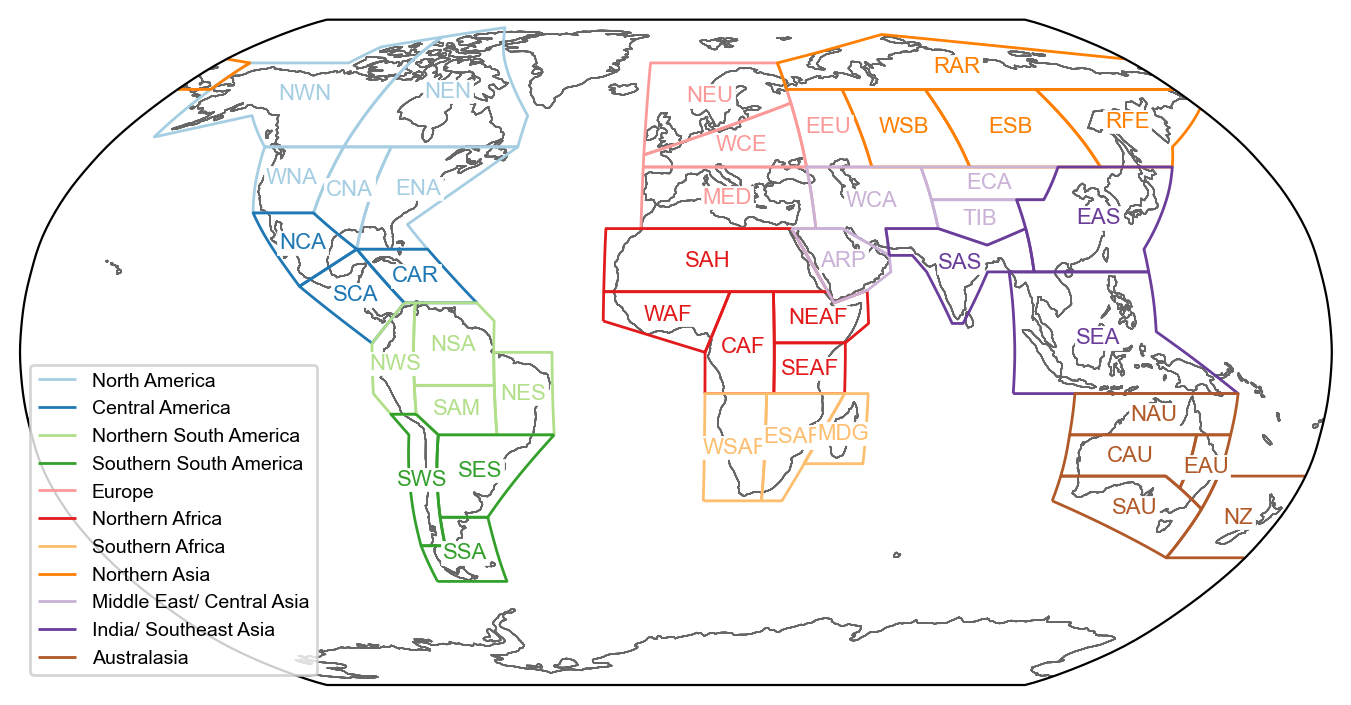

In [9]:
scaling_plot.plot_region_groups()

fN = conf.cmip6.figure_filename("scaling_region_groups", "Figure_11.3_TXx_scaling")

plt.savefig(fN + ".pdf")
plt.savefig(fN + ".png", dpi=300, facecolor="w")

## Scaling plot

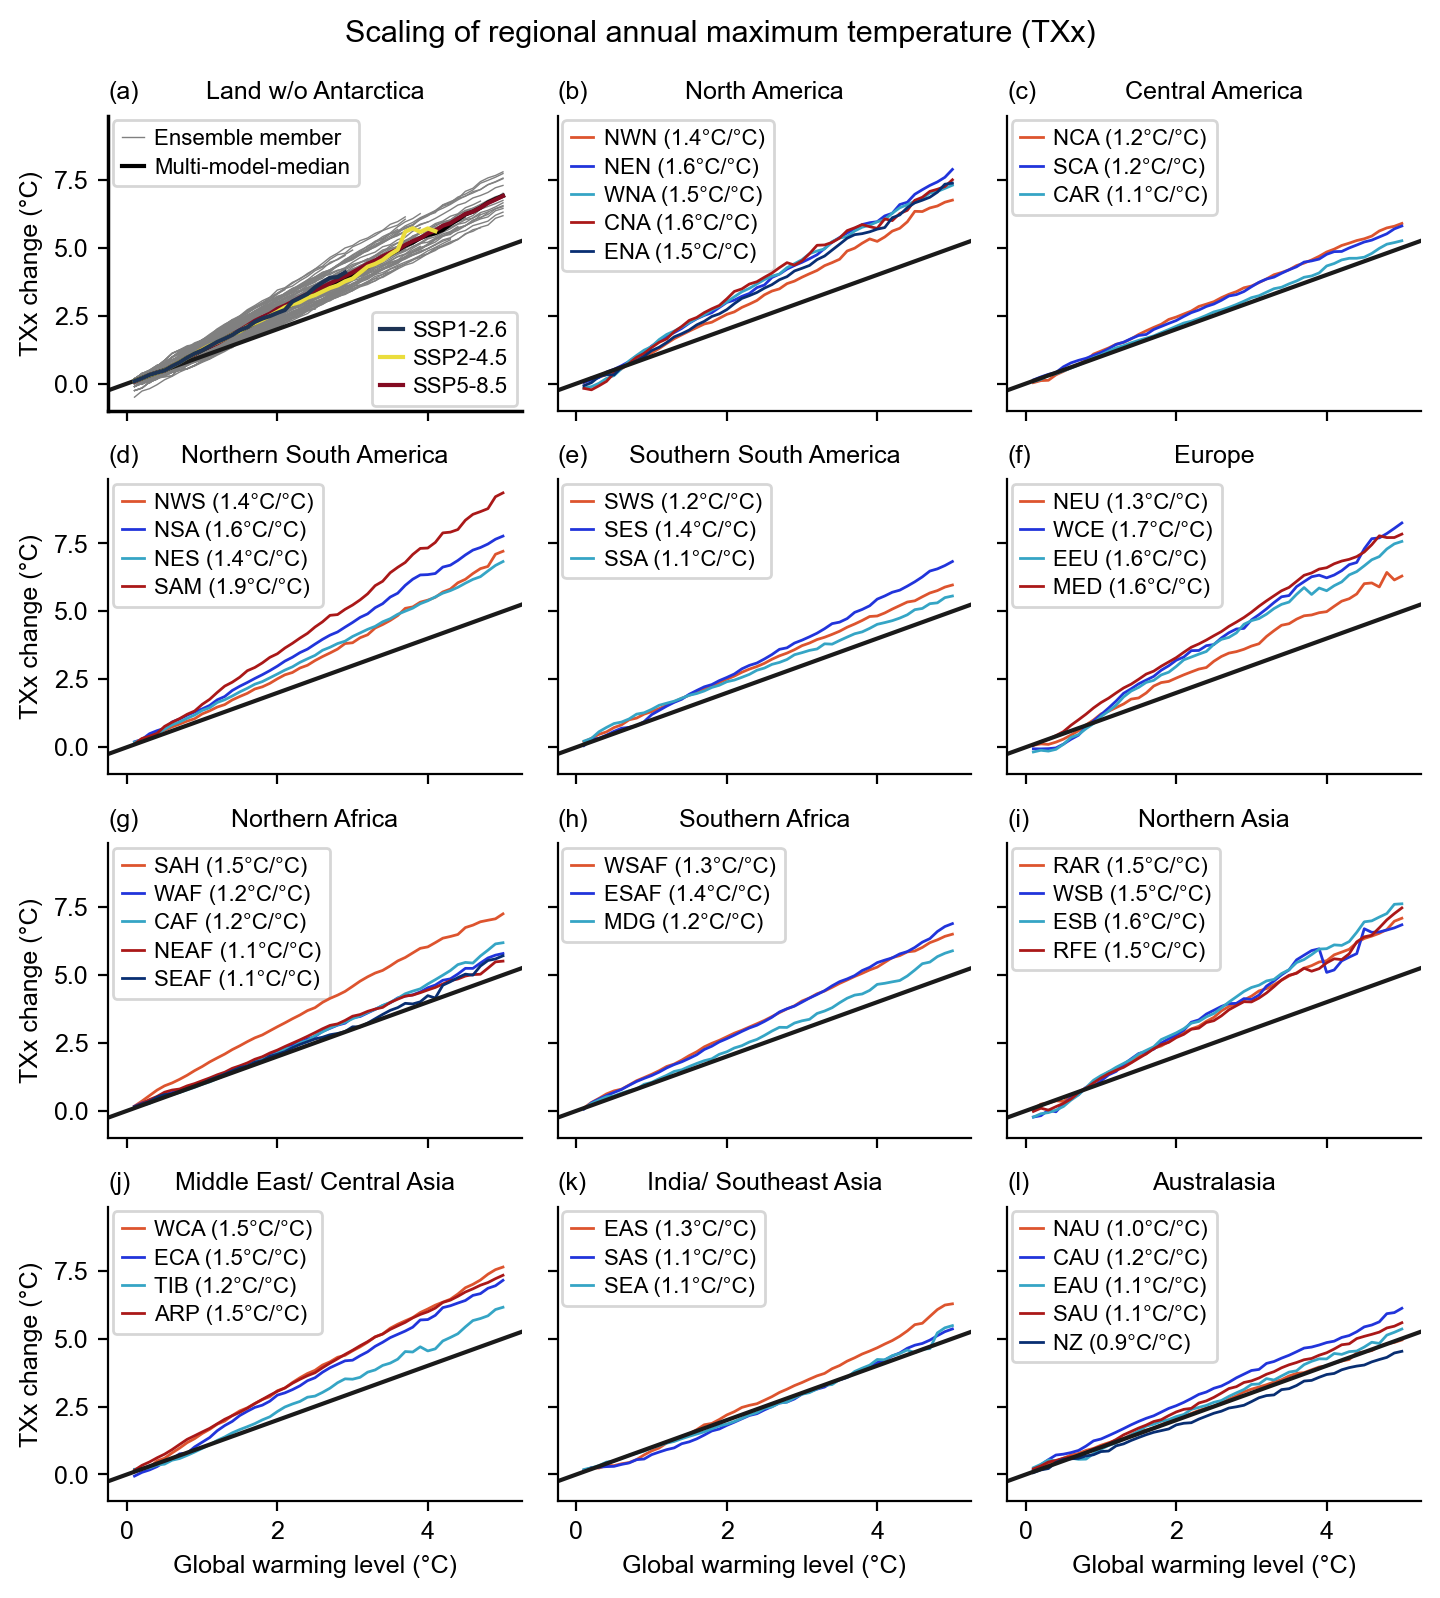

In [10]:
colors = sns.color_palette("colorblind", 5)


scaling_plot.plot_scaling(
    c6_at_warming_txx,
    title="Scaling of regional annual maximum temperature (TXx)",
    conf_cmip=conf.cmip6,
    ylabel="TXx change (°C)",
)


fN = conf.cmip6.figure_filename(
    "Figure_11.3_TXx_scaling", FIGURE_FOLDER, add_prefix=False
)

plt.savefig(fN + ".pdf")
plt.savefig(fN + ".png", dpi=300, facecolor="w")


# data tables
fN = conf.cmip6.figure_filename(
    "Figure_11.3_TXx_scaling", FIGURE_FOLDER, "data_tables", add_prefix=False
)

# use the non-concatenated data
data_tables.save_simulation_info_raw(fN + "_md_raw", c6_at_warming_txx_[0], panel="a-l")

In [11]:
# save figure data
varn = "TXx"
sfd = save_figuredata.SaveFiguredata(
    figure="Figure 11.3",
    units="°C",
    varn=varn,
)

fN = conf.cmip6.figure_filename(
    f"Figure_11.3_cmip6_{varn}_scaling.nc",
    FIGURE_FOLDER,
    "figure_data",
    add_prefix=False,
)

c6_at_warming_txx.attrs["long_name"] = "Annual maximum temperature"
c6_at_warming_txx.attrs["comment"] = "anomaly wrt 1850-1900"

ds = sfd.scaling(
    da=c6_at_warming_txx,
    panels="(a) to (l)",
)
ds.to_netcdf(fN)